In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

palette = ["red", "blue", "green", "orange", "purple", "#AF7595", "#E6480F", "#FA9500"]
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (14.0, 6)

%load_ext autoreload
%autoreload 2

from dotenv import load_dotenv
load_dotenv()

from pathlib import Path
from tqdm.auto import tqdm
import logging, os, re
import collections, functools, itertools

import torch

from loguru import logger
logger.remove()
logger.add(os.sys.stdout, colorize=True, format="<level>{time} | {message}</level>")


1

# index

In [2]:
stocks = sorted(Path('../experiments/stocks/saved-outputs').glob('*'))
results = []
for stock in stocks:
    rs = sorted(stock.glob("*"))
    for p in rs:
        model, date = p.stem.split('_', 1)
        splits = p.stem.split('_')
        date = splits[-1]
        model = '_'.join(p.stem.split('_')[:-1])
        stock_name = p.parent.name
        results.append(dict(
            model=model,
            stock=stock_name,
            date=pd.Timestamp(date),
            path=p
        ))

In [3]:
df_r = pd.DataFrame(results)
df_r

,model,stock,date,path
0,lstm,ADBE,2020-07-21,../experiments/stocks/saved-outputs/ADBE/lstm_...
1,lstm,ADBE,2020-08-18,../experiments/stocks/saved-outputs/ADBE/lstm_...
2,lstm,ADBE,2020-09-16,../experiments/stocks/saved-outputs/ADBE/lstm_...
3,lstm,ADBE,2020-10-14,../experiments/stocks/saved-outputs/ADBE/lstm_...
4,lstm,ADBE,2020-11-11,../experiments/stocks/saved-outputs/ADBE/lstm_...
...,...,...,...,...
145,volt_ewma300,GOOG,2022-02-18,../experiments/stocks/saved-outputs/GOOG/volt_...
146,volt_ewma300,GOOG,2022-03-21,../experiments/stocks/saved-outputs/GOOG/volt_...
147,volt_ewma300,GOOG,2022-04-19,../experiments/stocks/saved-outputs/GOOG/volt_...
148,volt_ewma300,GOOG,2022-05-17,../experiments/stocks/saved-outputs/GOOG/volt_...


In [4]:
df_r.model.value_counts(), df_r.stock.value_counts()

(lstm            75
 volt_ewma300    75
 Name: model, dtype: int64,
 ADBE    50
 AMZN    50
 GOOG    50
 Name: stock, dtype: int64)

# load

In [5]:
df_r.stock.value_counts()

ADBE    50
AMZN    50
GOOG    50
Name: stock, dtype: int64

In [6]:
tckr = "ADBE"

from voltron.data import make_ticker_list, GetStockHistory

Warning no robinhood utils.


In [7]:
ntrain = 400
lookback = 500
forecast_horizon = 100
print(tckr)
end_date = pd.Timestamp.now().floor('D') - pd.Timedelta('1d')
data = GetStockHistory(tckr, end_date=end_date, history=ntrain + lookback)
data

ADBE


IndexError: index 0 is out of bounds for axis 0 with size 0

In [ ]:
row = df_r.iloc[0]
print(row)
r = torch.load(row.path)
# plt.plot(r.T)
forecast_horizon=20
r.shape

model                                                 lstm
stock                                                 ADBE
date                                   2020-07-21 00:00:00
path     ../experiments/stocks/saved-outputs/ADBE/lstm_...
Name: 0, dtype: object


torch.Size([1000, 20])

In [ ]:
# data['Close'].plot()

1

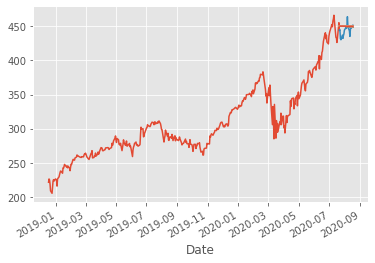

In [ ]:
past = data.loc[:row['date']].tail(lookback)['Close']
future = data.loc[row['date']:].head(forecast_horizon)['Close']
past.plot()
future.plot()

plt.plot(future.index, r.T+past.iloc[-1])
1

1

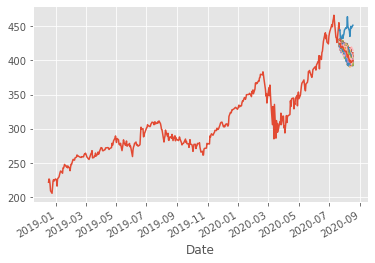

In [ ]:
past = data.loc[:row['date']].tail(lookback)['Close']
future = data.loc[row['date']:].head(forecast_horizon)['Close']
past.plot()
future.plot()

plt.plot(future.index, r.T*70)
1

In [ ]:
row = df_r.query('model=="volt_ewma300"').iloc[0]
print(row)
r = torch.load(row.path)
forecast_horizon=100
r.shape

model                                         volt_ewma300
stock                                                 ADBE
date                                   2020-07-21 00:00:00
path     ../experiments/stocks/saved-outputs/ADBE/volt_...
Name: 25, dtype: object


torch.Size([1000, 100])

1

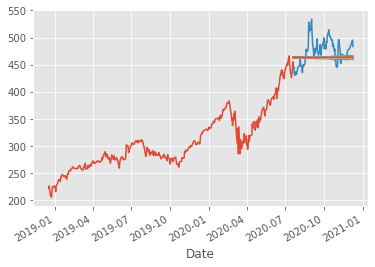

In [ ]:
past = data.loc[:row['date']].tail(lookback)['Close']
future = data.loc[row['date']:].head(forecast_horizon)['Close']
past.plot()
future.plot()

plt.plot(future.index, 3*r.T+past.iloc[-1])
1

1

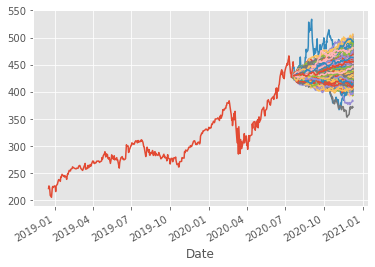

In [ ]:
past = data.loc[:row['date']].tail(lookback)['Close']
future = data.loc[row['date']:].head(forecast_horizon)['Close']
past.plot()
future.plot()

plt.plot(future.index, r.T*70)
1